**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Using linear SVC to classify music genres of an unbalanced dataset* 

## Abstract

Music genre classification is an interesting and relevant problem, where the possibility to automatically classify and sort music has many user applications. There is lot of well labeled data available and accessible. Before solving the actual classification problem the data needs to be analysed and pre-processed. Here this was done utilizing Matlab. The provided data set was cleaned of errors, and normalized according to feature group. At this point it was noted that the data set was unbalanced, which put constraints on the classification process. The classification process was done using the Sci-Kit Learn library in Python. As our final classifier we choose the linear Support Vector Classifier, as that yielded good results in the experiments. The accuracy of the model was tested by both accuracy of the predicted labels and the Log Loss metric. Although not excellent the chosen model managed to beat the benchmark and with some smart parameter choices achieve reasonably good predictions.

## 1. Introduction

The focus of this project was to be able to correctly classify songs into genres based on a set of features gathered from each song. To do this, the songs feature sets have been divided into a training and a test set, and labels provided for the training set.

The problem is an interesting machine learning task as the amount of data(songs) available worldwide is quite huge and the solution could have many applications, for example in providing users of different music services with a way to find new music based on a genre they like.

It will also be a interesting learning process as it involve all parts of a Machine learning problem. The first task is to analyse the provided data, and pre-process it so that errors in the data set or large differences in value orders do not interfere with the classification process.

The second part was to select an appropriate classification method. As there are quite a lot of different methods available there will be some need for experimentation and testing before finding good candidates to pursue further.

The actual testing of the solution was tested via two [Kaggle](#refs) competitions. One for accuracy of the predicted labels and one for the Log Loss value of the predictions.

## 2. Data analysis

Before starting the classification process the data set need to be understood and cleaned up. So that errors in the data set does not negatively affect the classification and before that the normalization process.

The data visualization and clean up was done in Matlab. The script used to clean up the data set can be found in [Appendix A](#appA). The clean up and normalization choices are described below.

As described in the DAP inctructions [document](#refs), the feature set consists of X larger parts with their separate bands and characteristics. The amount of different separate characteristics was not so large that manual inspection, via visualization, proved more resource efficient than implementing a checking algorithm.

The features were visualized with [Matlab](#refs) on a characteristics basis, that is all bands of a characteristics were plotted as a line plot for each instance in the data set. For an example see the figure below. As can be seen from the figure the individual lines are not clear but if any data points were to be in another order of magnitude the plot would be skewed and it would be very noticeable. This method is of course only feasible with a small enough feature set that is well understood, but in this case it is good enough. Contour plots were also tried but to properly see the set of songs needed to be cut into small 100 count segments and that made it a not so practical approach.

![Alt text](Viz.png "Vizualization of Rythm means bands 1 to 24")

Another interesting aspect that could also be found while visualising the training set was the distribution of the labels, which is shown in the figure below. From the figure it is quite clear that the dataset is unbalanced and that class 1 is dominating. The provided [article](#refs) gave some ideas for how this could be tackled.

![Alt text](dist_labels.png "Distribution of labels")

Utilizing this method one instance of bad data was found. The first 4 bands on the YYYY characteristics were all 10 000 for all songs in the data set, whereas the remaining bands were in the range of 0 to 1, keeping the 10 000 in the data set would have largely skewed the dataset, when normalizing. There for it was concluded to set these to 0, as they were the same for all songs. Figures below shows the a contour map before and after the clean up for the first 50 songs.

![Alt text](map_error.png "Contour with error")
<center>*With errors uncorrected, all other values drowns out.*</center>


![Alt text](map_norm.png "Contour corrected and normalized")
<center>*With errors corrected, peaks visable.*</center>

The normalization was also done in a controlled way. The feature set was normalized on a characteristics basis over all the bands belonging to that characteristics. For example features 1 to 24 were normalized with the maximum value found in this subgroup from all the songs. 

The test data set was also cleaned up and normalized in the same way. Afterwards the two sets were written in csv format for utilization in Python.

[Appendix B](#appB) also explains the tested super sampling which did not in the end yield any better results.


In [1]:
#This requires you to upload the Data.csv, Test.csv and the train_labels.csv provided in the zip.
#The Data and Test file contains the normalized and cleaned data from Matlab!
#Train labels has an extra label row added to make phyton not skip the first value,
# make sure to use the provided one from the zip.

#import libs
#some were used only for experimentation but are left for curiosa.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import itertools


#Read the samples
X = np.asarray(pd.read_csv("Data.csv"))
#print(X)

#Read the classes
Y = np.ravel(np.asarray(pd.read_csv("train_labels.csv")))
#print(Y)

test = np.asarray(pd.read_csv("Test.csv"))

## 3. Methods and experiments

Before choosing a final method to implement in [scikit learn](#refs) in Python, we decided to try the data set in Matlab’s quick [classifier app](#refs) to test different approaches before moving over to the python environment.

In Matlab the normalized training data was tested and validated using both the cross fold and hold out [method](#refs). In this case however there were very small differences between the hold out and cross fold method. The data was trained using many of the different classifier options and from this a few different methods were chosen, based on their accuracy scores. During this stage we also tested different feature reduction methods but this had an negative effect on the outcome. Probably because the data set was already quite small. Also undersampling was tested to see if the imbalance of the labels could be handled that way but the effects were worse probably due to the same reasons as with feature reduction. These methods were then further tested in Python. The methods that yielded high results were, Deep Trees and different degrees of Support Vector Machines([SVM](#refs)).

Implementing the methods in Python using the scikit package was quite straight forward. And after some further testing the final method chosen was the [Support Vector Classifier](#refs) with balanced class weight option. At this stage the already mentioned super sampling technique was also ruled out, this might have been because the oversampling leads to a higher over fitting.

Support vector Machines build on the principle of constructing hyperplanes in higher dimensional space in order to achieve separation between the classes. In cases where complete separation can’t be achieved the metode utilizes a so called soft margin approach. Where a [hinge loss](#refs) function. The mathematical formulation is:

$$ \min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i $$

$$ \textrm{subject to } y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i, $$

$$ \zeta_i \geq 0, i=1, ..., n $$

The dual of this is: 

$$\min_{\alpha} \frac{1}{2} \alpha^T Q \alpha - e^T \alpha $$

$$\textrm{subject to } y^T \alpha = 0$$

$$ 0 \leq \alpha_i \leq C, i=1, ..., n $$

Here $e$ is a vector with all elements being 1, $C>0$ acts as an upper bound. Q is a semidefinte positive matrix which components map the training vector into the higher dimensional space via the kernel funtion, $K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$, fur further information please see the [documentation](#refs).

With a decision function of:

$$\operatorname{sgn}(\sum_{i=1}^n y_i \alpha_i K(x_i, x) + \rho)$$

It should be noted however that SVM methods works with binary classes, which in turn means that multi class problems, such as this is turned into a set of binary problems.

To compute the problem mostly default parameters were used, the final choice used was `Calibrated Classifier CV` with `LinearSVC` estimate and weighted classes, with C set to 4.

From the scikit SVC function its possible to get the needed output for the accuracy part directly, but for the log loss output the `CalibratedClassifierCV` function has the needed subfunction `.predict_proba` to be utilized.


In [2]:
# This cell takes roughly 6 to 10min to run on the jupyter server.
# While running it will produce convergence warnings before finnishing but just let it run.
# If this cell dont run and you didnt upload the csv files included in the zip. Check that the labels.csv has a label row. 

clf = CalibratedClassifierCV(LinearSVC(random_state=0,class_weight='balanced',C=4,max_iter=2000),cv=5)
sampleID = np.reshape(np.asarray(list(range(1,len(test)+1))),(6544,1))
predictedValues = np.reshape(np.asarray(clf.fit(X,Y).predict(test)),(6544,1))
logloss = np.reshape(np.asarray(clf.fit(X,Y).predict_proba(test)),(6544,10))
e = clf.predict_proba(X)
print('Probability score for test set: ' +str(clf.predict_proba(test)))
print('Logloss Score: ' + str(log_loss(Y, e)))
print('Accuracy Score: '+str(clf.score(X,Y)))


result = np.append(sampleID,predictedValues,axis=1)
#print(result)
#np.savetxt("reslut.csv",np.array(clf.fit(X,Y).predict(test)).astype(int),delimiter=",")
with open("accuracy.csv", "wb") as f:
    f.write(b'Sample_id,Sample_label\n')
    np.savetxt(f, result.astype(int), fmt='%i', delimiter=",")


result2 = np.append(sampleID,logloss.astype(float),axis=1)
#print(result2)
#np.savetxt("reslut.csv",np.array(clf.fit(X,Y).predict(test)).astype(int),delimiter=",")
with open("logloss.csv", "wb") as f:
    f.write(b'Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10\n')
    np.savetxt(f, result2, delimiter=",")


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Probability score for test set: [[ 0.22132098  0.00604774  0.28738843 ...,  0.01014763  0.01307311
   0.0232201 ]
 [ 0.053451    0.00124232  0.16558157 ...,  0.02446502  0.08146505
   0.0134002 ]
 [ 0.65248302  0.00627016  0.00562219 ...,  0.07931566  0.00261059
   0.06486142]
 ..., 
 [ 0.81838025  0.02776009  0.03880433 ...,  0.0239401   0.00095814
   0.00862851]
 [ 0.25771706  0.02256205  0.63954187 ...,  0.00148784  0.00144743
   0.00514445]
 [ 0.61899873  0.01832901  0.00101968 ...,  0.10293585  0.00315912
   0.02413313]]
Logloss Score: 0.91481877974
Accuracy Score: 0.706394682558


## 4. Results

The best results were achieved with the Calibrated Classifier CV with LinearSVC estimate and weighted classes. The achieved accuracy scores were 0.70639. This yielded a accuracy score of 0.59806 on kaggle.

The log loss was similarly tested in Python using the built in functions which yielded a score of 0.91482 on the training set and later a score of 0.19165 in kaggle.

The confusion matrix of the training set can be seen in the figure below. From the matrix it is clear that most errors comes from dealing with the 1st class, which is heavily over estimated by the model especially for the last classes, which were the smallest in the set. This was maybe to expected as the 1st class is so dominating.

![Alt text](confusion_matrix_One_VS_One.png "Confusion matrix")
<center>*Confusion matrix of the training set.*</center>




/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Normalized confusion matrix
[[ 0.92  0.05  0.01  0.01  0.    0.01  0.    0.    0.    0.  ]
 [ 0.32  0.57  0.04  0.06  0.    0.01  0.    0.    0.    0.  ]
 [ 0.17  0.09  0.68  0.    0.    0.04  0.    0.    0.02  0.  ]
 [ 0.31  0.12  0.03  0.51  0.    0.03  0.    0.    0.    0.  ]
 [ 0.67  0.06  0.05  0.03  0.13  0.06  0.    0.    0.    0.  ]
 [ 0.47  0.15  0.11  0.06  0.02  0.15  0.    0.02  0.03  0.  ]
 [ 0.59  0.09  0.09  0.06  0.06  0.03  0.03  0.03  0.    0.  ]
 [ 0.8   0.02  0.02  0.    0.    0.04  0.    0.13  0.    0.  ]
 [ 0.4   0.15  0.2   0.05  0.    0.    0.    0.    0.2   0.  ]
 [ 0.88  0.04  0.    0.04  0.    0.    0.04  0.    0.    0.  ]]


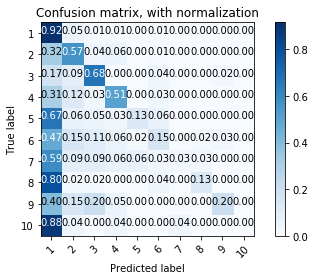

In [3]:
#Takes 5 minutes to run on the jupyter server!
#Produces convergence warning but just let it run it will finnish.

# Split the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
y_pred = clf.fit(X_train,Y_train).predict(X_test)

#Plot confusion matrix from the scikit example
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,normalize=True, classes= [1,2,3,4,5,6,7,8,9,10],
                      title='Confusion matrix, with normalization')

plt.show()

## 5. Discussion/Conclusions

There was quite a difference between the training data sets scores and the one from kaggle, but this is to be expected as the methods used has some inherited over fitting that is hard to get rid of. The big suprise though was the difference in the log loss function were the kaggel score was better than the pyhton internal for the training set. For this we have not been able to find a good explanation. 

The results could definitely be improved open but might require some different approaches already on the data preparation and normalization stage. The classifier method used might also not be the best for this kind of a problem. The model seems to have a bit of a problem dealing with the imbalance of the classes. It might be that this is the property that adds the biggest difficulty to the classification problem. In such a case it could be a good idea to go with a classifier that is especially good at dealing with imblanced data sets, such at some kind of [boosted tree model](#refs). 

However the chosen method managed to beat the benchmark by quite a big margin, 10 percentage points. Also as the dataset was quite small, it is probably not a good idea to go to more advance modern methods which usually requires quite large amounts of data.

However one improvment that could have been done would have been to implment some form of parameter optimizer to finds the optimal parameters for the SVC, something like the `.GridSearchCV`([ref](#refs)).


## 6. References

<a id='refs'></a>
**Kaggle** https://www.kaggle.com/



**MLBP 2018 Data Analysis Project** https://mycourses.aalto.fi/pluginfile.php/743413/mod_resource/content/14/MLBP%202018%20project%20description.pdf

**Mathworks Matlab** https://se.mathworks.com/help/matlab/index.html

**8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset, Jason Brownlee, August 19, 2015, Machine Learning Process**
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

**Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.** http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

**Matlab Classification learner app** https://se.mathworks.com/help/stats/classification-learner-app.html

**Matlab Classification learner app, Select Data and Validation for Classification Problem**
https://se.mathworks.com/help/stats/select-data-and-validation-for-classification-problem.html

**Support vector machine**https://en.wikipedia.org/wiki/Support_vector_machine

**Scikit-learn:sklearn.svm.LinearSVC** http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

**Hinge Loss, Wikipedia** https://en.wikipedia.org/wiki/Hinge_loss

**SVC mathematical explanation, SciKit-Learn** http://scikit-learn.org/stable/modules/svm.html#svc

**Scikit-learn: sklearn.model_selection.GridSearchCV**
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Appendix A

<a id='appA'></a>

The matlab script utilized to clean up and normalize the data. 

```matlab
%The training and test data sets need to be imported into matlab first
%With variable names testdata and traindata
Data = traindata;
bands = 0:7;
bands = bands*24;
for i=1:7
    max_B = max(Data{:,bands(i)+1:bands(i+1)},[],'all');
    Data{:,bands(i)+1:bands(i+1)} = Data{:,bands(i)+1:bands(i+1)}/max_B;
end

bands = 0:4;
bands = bands.*12;
bands = bands+168;

for i=1:4
    max_B = max(Data{:,bands(i)+1:bands(i+1)},[],'all');
    Data{:,bands(i)+1:bands(i+1)} = Data{:,bands(i)+1:bands(i+1)}/max_B;
end

bands = 0:4;
bands = bands*12;
bands = bands+216;
Data{:,217:220} = 0;

for i=1:4
    max_B = max(Data{:,bands(i)+1:bands(i+1)},[],'all');
    Data{:,bands(i)+1:bands(i+1)} = Data{:,bands(i)+1:bands(i+1)}/max_B;
end

writetable(Data,'Data.csv')
%test noramlization
Test = testdata;
bands = 0:7;
bands = bands*24;
for i=1:7
    max_B = max(Test{:,bands(i)+1:bands(i+1)},[],'all');
    Test{:,bands(i)+1:bands(i+1)} = Test{:,bands(i)+1:bands(i+1)}/max_B;
end

bands = 0:4;
bands = bands.*12;
bands = bands+168;

for i=1:4
    max_B = max(Test{:,bands(i)+1:bands(i+1)},[],'all');
    Test{:,bands(i)+1:bands(i+1)} = Test{:,bands(i)+1:bands(i+1)}/max_B;
end

bands = 0:4;
bands = bands*12;
bands = bands+216;
Data{:,217:220} = 0;

for i=1:4
    max_B = max(Test{:,bands(i)+1:bands(i+1)},[],'all');
    Test{:,bands(i)+1:bands(i+1)} = Test{:,bands(i)+1:bands(i+1)}/max_B;
end

writetable(Test,'Test.csv')

```


## Appendix B

<a id='appB'></a>

One of the ides we tested before choosing the final method was to super sample the data set in an effort to combat the imbalance between the different classes. As we were afraid that this imbalance would lead bad accuracy, as was stated in the article posted on slack. This however did not in the ned lead to any noticeable increase in accuracy so the it was decided that it is better to go with the simplest solution that achieves good enough results. The matlab code used to generate the supersampled data set is anyway added for curiosa. 


```matlab
%The training and test datasets as well as training labels need to be imported into matlab first
%With variable names testdata and traindata, trainlabels
index1 = find(trainlabels{:,:} == 1);
index2 = find(trainlabels{:,:} == 2);
index3 = find(trainlabels{:,:} == 3);
index4 = find(trainlabels{:,:} == 4);
index5 = find(trainlabels{:,:} == 5);
index6 = find(trainlabels{:,:} == 6);
index7 = find(trainlabels{:,:} == 7);
index8 = find(trainlabels{:,:} == 8);
index9 = find(trainlabels{:,:} == 9);
index10 = find(trainlabels{:,:} == 10);

N_target = size(index1,1);
SData = Data;
SLabels = trainlabels;

N2 = size(index2,1);

for i = 1:(N2)
    j = randi(N2);
    SData = [SData; SData(index2(j),:)];
    SLabels = [SLabels; SLabels(index2(j),:)];
end

N3 = size(index3,1);

for i = 1:(N3)
    j = randi(N3);
    SData = [SData; SData(index3(j),:)];
    SLabels = [SLabels; SLabels(index3(j),:)];
end

N4 = size(index4,1);

for i = 1:(N4)
    j = randi(N4);
    SData = [SData; SData(index4(j),:)];
    SLabels = [SLabels; SLabels(index4(j),:)];
end

N5 = size(index5,1);

for i = 1:(N5)
    j = randi(N5);
    SData = [SData; SData(index5(j),:)];
    SLabels = [SLabels; SLabels(index5(j),:)];
end

N6 = size(index6,1);

for i = 1:(N6)
    j = randi(N6);
    SData = [SData; SData(index6(j),:)];
    SLabels = [SLabels; SLabels(index6(j),:)];
end

N7 = size(index7,1);

for i = 1:(N7)
    j = randi(N7);
    SData = [SData; SData(index7(j),:)];
    SLabels = [SLabels; SLabels(index7(j),:)];
end

N8 = size(index8,1);

for i = 1:(N8)
    j = randi(N8);
    SData = [SData; SData(index8(j),:)];
    SLabels = [SLabels; SLabels(index8(j),:)];
end
%% 

N9 = size(index9,1);

for i = 1:(N9)
    j = randi(N9);
    SData = [SData; SData(index9(j),:)];
    SLabels = [SLabels; SLabels(index9(j),:)];
end

N10 = size(index10,1);

for i = 1:(N10)
    j = randi(N10);
    SData = [SData; SData(index10(j),:)];
    SLabels = [SLabels; SLabels(index10(j),:)];
end

SLabels.Properties.VariableNames{1} = 'Labels';
SData_m = [SData SLabels];

writetable(SData, 'SData.csv')
writetable(SLabels, 'SLabels.csv')

```